<a href="https://colab.research.google.com/github/Marcin-The-Pythonist/Projects/blob/main/Titanic_surviviors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data & Libraries


In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [2]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('titanic.csv')
df = df.drop('Name', axis=1) # Drop names because it doesn't tell us anything.
df = df.drop('Fare', axis=1) # Drop fare as it is related to Pclass
df['Sex'] = np.where(df.Sex == 'female', 1,0) # Dummy variables
df.head(5)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


# Data Analysis

In [4]:
df.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,0.385569,2.305524,0.354002,29.471443,0.525366,0.383315
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


<Axes: >

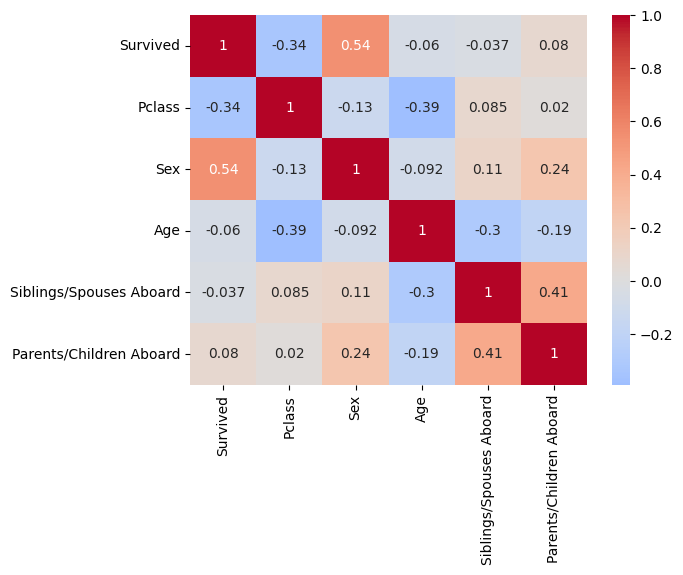

In [5]:
sns.heatmap(df.corr(),
            cmap='coolwarm',
            annot = True,
            center = 0)

# Logistic regression

In [6]:
# Exog and endog
X = df.iloc[:,1:]
X = sm.add_constant(X)
Y = df.Survived

In [7]:
# Training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size = 0.2,
                                                    random_state=1555)

In [8]:
# Model
model = sm.Logit(exog = X_train, endog = Y_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.448823
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            5
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.3209
Time:                        22:10:05   Log-Likelihood:                -318.22
converged:                       True   LL-Null:                       -468.60
Covariance Type:            nonrobust   LLR p-value:                 6.853e-63
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.2232      0.503      6.402      0.000       2.236   

In [15]:
# Predictions
prediction = model.predict(X_test)
prediction = np.where(prediction >= 0.58,1,0)


array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0])

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[89, 12],
       [18, 59]])

In [11]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       101
           1       0.83      0.77      0.80        77

    accuracy                           0.83       178
   macro avg       0.83      0.82      0.83       178
weighted avg       0.83      0.83      0.83       178



# Plotting how exogenious values affect survival rate


<ipython-input-45-6528a8818146>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x = df.Pclass, y = df.Survived, palette=['r','orange','yellow'])


Text(0, 0.5, 'Survival rate')

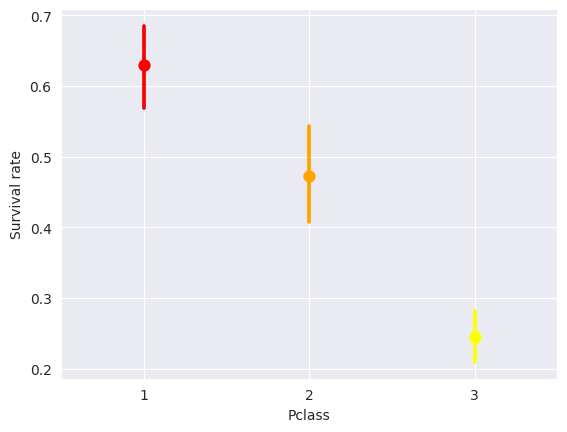

In [45]:
sns.set_style("dark")
sns.color_palette('pastel')
sns.pointplot(x = df.Pclass, y = df.Survived, palette=['r','orange','yellow'])
plt.grid()
plt.ylabel("Survival rate")